## Dengue Fever Prediction
By: Jack Ross

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_train.csv'),
                 pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_labels_train.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/dengue_features_test.csv')
sample_submission = pd.read_csv('https://raw.githubusercontent.com/JackRossProjects/Dengue-Fever-Predictive-Modeling/master/DengueFeverData/submission_format.csv')

In [20]:
train, val = train_test_split(train, test_size=.3,  
                              random_state=42)

## 231 Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?

In [21]:
target = 'total_cases'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [22]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

- [X] Is your problem regression or classification?

In [23]:
# My problem is a regression problem. I am trying to find a numerical
# (continuous) value for total_cases. 

- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.

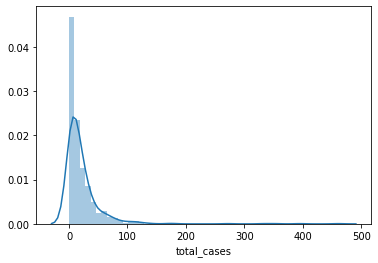

In [24]:
import seaborn as sns
sns.distplot(y_train)

# The target seems to be right-skewed

In [25]:
y_train_log = np.log1p(y_train)

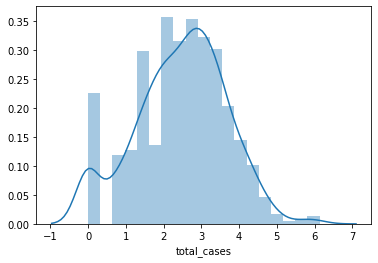

In [26]:
sns.distplot(y_train_log)

- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

In [27]:
# I will use root mean squared error (RMSE) for my evalutation metric
# FOR NOW. After I clean the data and look for outliers, I will revisit
# this because RMSE harshly penalizes outliers. I will also use 
# adjusted R squared because it will allow me to know how useful my
# predictor terms are.

- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?

In [28]:
# I have done a 30% random split with train/val

In [29]:
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
600,sj,2001,46,2001-11-12,0.094100,0.112700,0.196171,0.213200,287.55,299.420000,...,81.081429,287.55,17.308571,2.242857,26.585714,5.557143,33.3,22.2,96.0,71
40,sj,1991,6,1991-02-05,0.380100,0.228567,0.255043,0.225800,0.00,297.740000,...,75.794286,0.00,14.541429,2.428571,25.057143,6.885714,30.0,20.6,7.3,17
1368,iq,2008,43,2008-10-21,0.329157,0.227900,0.273343,0.256843,52.65,297.867143,...,93.854286,52.65,18.388571,8.714286,27.333333,10.066667,35.5,21.5,24.2,44
1118,iq,2004,1,2004-01-01,0.202571,0.198967,0.244557,0.187957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
758,sj,2004,48,2004-11-25,0.043500,-0.060700,0.195157,0.242771,18.37,298.430000,...,74.302857,18.37,14.921429,1.971429,26.328571,4.900000,29.4,23.3,26.9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,sj,1996,33,1996-08-12,0.079500,0.029100,0.142520,0.231700,19.92,299.651429,...,80.935714,19.92,17.480000,2.614286,28.014286,6.128571,31.7,22.8,14.3,13
873,sj,2007,7,2007-02-12,-0.075200,-0.071940,0.243943,0.192314,0.00,298.444286,...,75.754286,0.00,15.184286,3.457143,26.157143,7.600000,32.2,21.1,0.3,14
69,sj,1991,35,1991-08-27,0.069300,0.057050,0.225040,0.186400,55.20,300.117143,...,81.594286,55.20,18.091429,2.371429,28.157143,7.000000,32.2,23.9,10.7,66
171,sj,1993,32,1993-08-13,0.101600,0.140100,0.218700,0.169257,7.25,300.121429,...,81.012857,7.25,17.988571,2.328571,29.028571,6.257143,32.8,25.0,18.1,25


In [30]:
val

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
325,sj,1996,31,1996-07-29,0.096833,0.115000,0.198614,0.204443,41.78,299.394286,...,81.910000,41.78,17.390000,2.200000,27.171429,5.157143,30.0,23.9,79.3,9
761,sj,2004,51,2004-12-16,-0.151650,-0.021400,0.182817,0.134257,5.54,298.802857,...,80.888571,5.54,16.621429,2.242857,26.271429,5.628571,30.6,22.8,30.6,15
1061,iq,2002,48,2002-11-26,0.310929,0.285229,0.290729,0.256329,60.15,298.350000,...,93.395714,60.15,18.784286,10.385714,28.100000,10.550000,34.0,22.0,17.2,11
1255,iq,2006,33,2006-08-20,0.290800,0.238675,0.285657,0.333700,47.74,298.648571,...,84.620000,47.74,17.065714,10.271429,27.666667,10.433333,33.3,20.9,75.5,2
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,sj,2003,46,2003-11-12,0.069250,0.055375,0.065486,0.074886,97.28,300.054286,...,81.825714,97.28,18.160000,2.300000,27.157143,6.857143,31.7,22.8,74.7,34
204,sj,1994,13,1994-04-02,0.097800,0.159750,0.127043,0.119529,46.62,298.281429,...,75.082857,46.62,14.945714,2.471429,26.700000,8.342857,33.3,21.1,1.0,23
421,sj,1998,23,1998-06-04,-0.042700,0.070767,0.153600,0.122143,8.19,299.618571,...,82.460000,8.19,17.765714,2.328571,27.857143,6.200000,32.2,23.9,10.5,51
1315,iq,2007,42,2007-10-15,0.225129,0.150514,0.195986,0.238386,74.52,299.444286,...,86.705714,74.52,18.265714,9.828571,29.000000,12.300000,35.2,21.9,4.1,6


- [ ] Begin to clean and explore your data.

In [35]:
train['weekofyear'].describe()

count    728.000000
mean      26.210165
std       15.270187
min        1.000000
25%       13.000000
50%       26.000000
75%       39.000000
max       53.000000
Name: weekofyear, dtype: float64

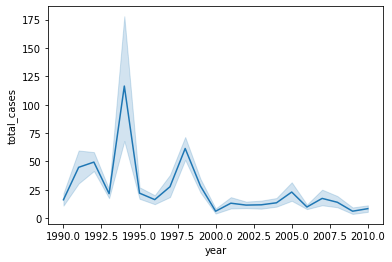

In [38]:
sns.lineplot(x='year', y='total_cases',data=train)

# A lot of values that should be ints are displayed as floats

- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?